In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import tensorflow as tf
from tensorflow import keras
import cv2 
import PIL
from PIL import Image 
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import randint  # Import randint from the random module
import pandas as pd
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import tensorflow_hub as hub

import os

In [2]:
male_file=os.listdir('/kaggle/input/faces-male-female/Male and Female face dataset/Male Faces')
female_file=os.listdir('/kaggle/input/faces-male-female/Male and Female face dataset/Female Faces')

In [3]:
print("Nim of Male Images = ",len(male_file))
print("Nim of Female Images = ",len(female_file))

Nim of Male Images =  2720
Nim of Female Images =  2698


In [4]:
male_label=[1]*len(male_file)
female_label=[0]*len(female_file)

In [5]:
labels=male_label+female_label
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


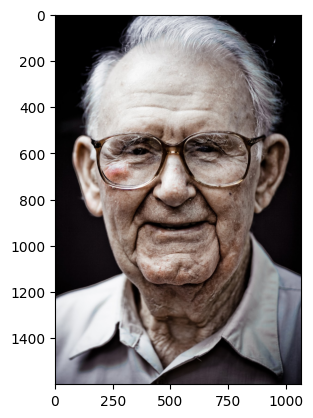

In [6]:
img=mimg.imread("/kaggle/input/faces-male-female/Male and Female face dataset/Male Faces/1 (1).jpeg")
plot=plt.imshow(img)
plt.show()

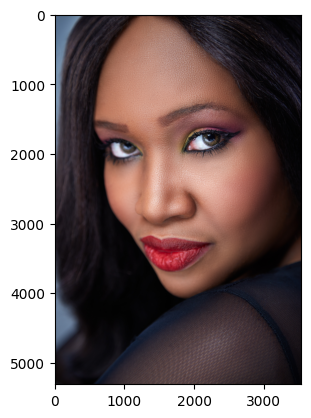

In [7]:
img=mimg.imread("/kaggle/input/faces-male-female/Male and Female face dataset/Female Faces/0 (1).jpeg")
plot=plt.imshow(img)
plt.show()

In [8]:
male_path='/kaggle/input/faces-male-female/Male and Female face dataset/Male Faces'

data=[]
for file in os.listdir(male_path):
    file_path = os.path.join(male_path, file)
    
    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

In [9]:
female_path='/kaggle/input/faces-male-female/Male and Female face dataset/Female Faces'

for file in os.listdir(female_path):
    file_path = os.path.join(female_path, file)
    
    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
data[0].shape

(128, 128, 3)

In [11]:
print(len(data))

5418


In [12]:
print(len(labels))

5418


In [13]:
X=np.array(data)
Y=np.array(labels)

In [14]:
X.shape

(5418, 128, 128, 3)

In [15]:
Y.shape

(5418,)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [17]:
x_train_scl=x_train/255
x_test_scl=x_test/255

In [18]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(2,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
Model=model.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 57s 396ms/step - accuracy: 0.5492 - loss: 0.9117 - val_accuracy: 0.7152 - val_loss: 0.5106
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 391ms/step - accuracy: 0.7898 - loss: 0.4462 - val_accuracy: 0.8955 - val_loss: 0.3170
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 53s 380ms/step - accuracy: 0.9062 - loss: 0.2444 - val_accuracy: 0.9447 - val_loss: 0.1775
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 84s 394ms/step - accuracy: 0.9687 - loss: 0.0893 - val_accuracy: 0.9672 - val_loss: 0.1462
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 393ms/step - accuracy: 0.9796 - loss: 0.0625 - val_accuracy: 0.9775 - val_loss: 0.0942
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 393ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9734 - val_loss: 0.1250
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 54s 393ms/step - accuracy: 0.9909 - loss: 0.0374 - val_accuracy: 0.9713 - val_loss: 0.1853
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 402ms/step - accuracy: 0.9952 - loss: 0

In [21]:
loss,acc=model.evaluate(x_test_scl,y_test)
print('The Accuracy = ',int(acc*100),'%')

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9758 - loss: 0.1927
The Accuracy =  97 %


In [22]:
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow(x_train,y_train,batch_size=32)

test_generator=datagen.flow(x_test,y_test,batch_size=32)

In [23]:
Nn_model=Sequential()
input_shape=(128,128,3)

Nn_model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
Nn_model.add(MaxPooling2D((2,2)))

Nn_model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
Nn_model.add(MaxPooling2D((2,2)))


Nn_model.add(GlobalAveragePooling2D())  

Nn_model.add(Dense(256,activation='relu'))
Nn_model.add(Dropout(0.6))

Nn_model.add(Dense(256,activation='relu'))
Nn_model.add(Dropout(0.6))

Nn_model.add(Dense(128,activation='relu'))
Nn_model.add(Dropout(0.6))
Nn_model.add(Dense(64,activation='relu'))
Nn_model.add(Dense(1,activation='sigmoid',kernel_regularizer=l2(0.001)))

In [24]:
Nn_model.compile(optimizer=Adam(0.0006),
                loss='binary_crossentropy',
                metrics=['accuracy'])
Nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,041 (558.75 KB)

 Trainable params: 143,041 (558.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True) 
History = Nn_model.fit(train_generator,epochs=10,batch_size=32,validation_data=test_generator,callbacks=[early_stopping])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 58s 356ms/step - accuracy: 0.4973 - loss: 0.6963 - val_accuracy: 0.5369 - val_loss: 0.6937
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 54s 354ms/step - accuracy: 0.5049 - loss: 0.6945 - val_accuracy: 0.5369 - val_loss: 0.6932
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.5062 - loss: 0.6947 - val_accuracy: 0.5369 - val_loss: 0.6938
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 83s 356ms/step - accuracy: 0.5077 - loss: 0.6944 - val_accuracy: 0.4631 - val_loss: 0.6957
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 81s 353ms/step - accuracy: 0.5044 - loss: 0.6935 - val_accuracy: 0.4631 - val_loss: 0.6987
